# **Arabic Letters OCR**

<h3 style="color:#000000;">  Importing libraries </h3>

In [11]:
import os
import glob
import shutil
import random
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms, utils
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor

In [2]:
torch.__version__

'1.12.0'

<h3 style="color:#000000;">  Preparing Data </h3>

In [3]:
root_dir = "/Users/lena/Downloads/arLetters"
class_names = sorted((f for f in os.listdir(root_dir) if not f.startswith(".")), key=str.lower)
if 'test' in class_names:
    class_names.remove('test')
print(class_names)
if os.path.exists(os.path.join(root_dir, 'test' + '/')):
    shutil.rmtree(os.path.join(root_dir, 'test' + '/'))
    
if os.path.isdir(os.path.join(root_dir, class_names[1])):
    if not os.path.exists(os.path.join(root_dir, 'test')):
        os.mkdir(os.path.join(root_dir, 'test'))

    for i, d in enumerate(class_names):
        os.rename(os.path.join(root_dir, d), os.path.join(root_dir, class_names[i]))

    for c in class_names:
        if not os.path.exists(os.path.join(root_dir, 'test', c)):
            os.mkdir(os.path.join(root_dir, 'test', c))

    for c in class_names:
        images = [x for x in os.listdir(os.path.join(root_dir, c)) if x.lower().endswith('png')]
        print(c)
        #choose 496 random samples from each letter representing 20% of data for testing
        selected_images = random.sample(images, 496)
        for image in selected_images:
            source_path = os.path.join(root_dir, c, image)
            target_path = os.path.join(root_dir, 'test', c, image)
            shutil.move(source_path, target_path)  

<h3 style="color:#000000;">  Creating Custom Dataset </h3>


In [4]:
class ARLettersDataset(torch.utils.data.Dataset):
    def __init__(self, image_dirs, transform):
        def get_images(class_name):
            images = [x for x in os.listdir(image_dirs[class_name]) if x[-3:].lower().endswith('png')]
            print(f'Found {len(images)} {class_name} examples')
            return images
        
        self.images = {}
        self.class_names = sorted((f for f in os.listdir(root_dir) if not f.startswith(".")), key=str.lower)
        if 'test' in self.class_names:
            self.class_names.remove('test')
        for class_name in self.class_names:            
            if(class_name != 'test'):
                self.images[class_name] = get_images(class_name)
            
        self.image_dirs = image_dirs
        self.transform = transform
        
    
    def __len__(self): 
        return sum([len(self.images[class_name]) for class_name in self.class_names])
    
    
    def __getitem__(self, index):
        class_name = random.choice(self.class_names)
        index = index % len(self.images[class_name])
        image_name = self.images[class_name][index]
        image_path = os.path.join(self.image_dirs[class_name], image_name)
        image = Image.open(image_path).convert('RGB')
        return self.transform(image), self.class_names.index(class_name)

<h3 style="color:#000000;">  Setting Transformations </h3>


In [5]:
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(32, 32)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.5], std=[0.5]),
    torchvision.transforms.Grayscale()
])

test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(32, 32)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.5], [0.5]),
    torchvision.transforms.Grayscale()
    
])

<h3 style="color:#000000;">  Calling Custom Dataset </h3>


In [6]:
train_dirs = {}
for i in range(len(class_names)):
    if(class_names[i] != 'test'):
        train_dirs[class_names[i]] = os.path.join(root_dir, class_names[i])

f = lambda *x: None; 
f( *( print( x,":",y ) for x,y in train_dirs.items() ) )
train_dataset = ARLettersDataset(train_dirs, train_transform)

ا : /Users/lena/Downloads/arLetters/ا
ب : /Users/lena/Downloads/arLetters/ب
ت : /Users/lena/Downloads/arLetters/ت
ث : /Users/lena/Downloads/arLetters/ث
ج : /Users/lena/Downloads/arLetters/ج
ح : /Users/lena/Downloads/arLetters/ح
خ : /Users/lena/Downloads/arLetters/خ
د : /Users/lena/Downloads/arLetters/د
ذ : /Users/lena/Downloads/arLetters/ذ
ر : /Users/lena/Downloads/arLetters/ر
ز : /Users/lena/Downloads/arLetters/ز
س : /Users/lena/Downloads/arLetters/س
ش : /Users/lena/Downloads/arLetters/ش
ص : /Users/lena/Downloads/arLetters/ص
ض : /Users/lena/Downloads/arLetters/ض
ط : /Users/lena/Downloads/arLetters/ط
ظ : /Users/lena/Downloads/arLetters/ظ
ع : /Users/lena/Downloads/arLetters/ع
غ : /Users/lena/Downloads/arLetters/غ
ف : /Users/lena/Downloads/arLetters/ف
ق : /Users/lena/Downloads/arLetters/ق
ك : /Users/lena/Downloads/arLetters/ك
ل : /Users/lena/Downloads/arLetters/ل
لا : /Users/lena/Downloads/arLetters/لا
م : /Users/lena/Downloads/arLetters/م
ن : /Users/lena/Downloads/arLetters/ن
ه : /Users

In [7]:
test_dirs = {}
for i in range(len(class_names)):
    if(class_names[i] != 'test'):
        test_dirs[class_names[i]] = os.path.join(root_dir, "test", class_names[i])

f = lambda *x: None; 
f( *( print( x,":",y ) for x,y in test_dirs.items() ) )

test_dataset = ARLettersDataset(test_dirs, test_transform)

ا : /Users/lena/Downloads/arLetters/test/ا
ب : /Users/lena/Downloads/arLetters/test/ب
ت : /Users/lena/Downloads/arLetters/test/ت
ث : /Users/lena/Downloads/arLetters/test/ث
ج : /Users/lena/Downloads/arLetters/test/ج
ح : /Users/lena/Downloads/arLetters/test/ح
خ : /Users/lena/Downloads/arLetters/test/خ
د : /Users/lena/Downloads/arLetters/test/د
ذ : /Users/lena/Downloads/arLetters/test/ذ
ر : /Users/lena/Downloads/arLetters/test/ر
ز : /Users/lena/Downloads/arLetters/test/ز
س : /Users/lena/Downloads/arLetters/test/س
ش : /Users/lena/Downloads/arLetters/test/ش
ص : /Users/lena/Downloads/arLetters/test/ص
ض : /Users/lena/Downloads/arLetters/test/ض
ط : /Users/lena/Downloads/arLetters/test/ط
ظ : /Users/lena/Downloads/arLetters/test/ظ
ع : /Users/lena/Downloads/arLetters/test/ع
غ : /Users/lena/Downloads/arLetters/test/غ
ف : /Users/lena/Downloads/arLetters/test/ف
ق : /Users/lena/Downloads/arLetters/test/ق
ك : /Users/lena/Downloads/arLetters/test/ك
ل : /Users/lena/Downloads/arLetters/test/ل
لا : /Users

<h3 style="color:#000000;">  Calculating Batches </h3>


In [8]:
batch_size = 128

dl_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dl_test = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

print('Number of training batches', len(dl_train))
print('Number of test batches', len(dl_test))

Number of training batches 450
Number of test batches 113


<h3 style="color:#000000;">  Data Visualization </h3>


In [9]:
class_names = train_dataset.class_names


def show_images(images, labels, preds):
    plt.figure(figsize=(8, 4))
    for i, image in enumerate(images[:6]):
        plt.subplot(1, 7, i + 1, xticks=[], yticks=[])
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.5])
        std = np.array([0.5])
        image = image * std + mean
        image = np.clip(image, 0., 1.)
        plt.imshow(image, cmap='gray')
        col = 'green'
        if preds[i] != labels[i]:
            col = 'red'
            
        plt.xlabel(f'{class_names[int(labels[i].numpy())]}')
        plt.ylabel(f'{class_names[int(preds[i].numpy())]}', color=col)
    plt.tight_layout()
    plt.show()

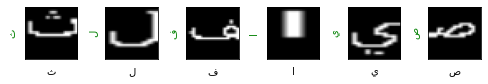

torch.Size([128, 1, 32, 32])


In [12]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
images, labels = next(iter(dl_train))
show_images(images, labels, labels)
print(images.shape)

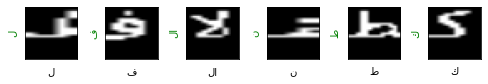

In [13]:
images, labels = next(iter(dl_test))
show_images(images, labels, labels)

<h3 style="color:#000000;">  Creating the Model </h3>


In [19]:
#model inspired by this source: https://www.kaggle.com/code/abublihi/arabic-handwriting-letters-recognition-pytorch
class ConvolutionNNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionNNetwork, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        #############################
        self.drop_out = nn.Dropout(0.25)
        #############################
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(4096, 1000)

        #############################
        self.drop_out = nn.Dropout(0.5)
        #############################
        self.fc2 = nn.Linear(1000, 29)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [20]:
# Train the model
# num_epochs = 32
num_epochs = 5

learning_rate = 0.001
# learning_rate = 1.0
# learning_rate = 0.1

total_step = len(dl_train)
loss_list = []
acc_list = []
model = ConvolutionNNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5);
criterion = nn.CrossEntropyLoss();

In [21]:
def show_preds():
    model.eval()
    images, labels = next(iter(dl_test))
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    show_images(images, labels, preds)
    
    
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(dl_train):
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
torch.save(model.state_dict(), "/Users/lena/Downloads/" + 'arlett_net_model.ckpt')


Epoch [1/5], Step [100/450], Loss: 0.3591, Accuracy: 88.28%
Epoch [1/5], Step [200/450], Loss: 0.0872, Accuracy: 97.66%
Epoch [1/5], Step [300/450], Loss: 0.1481, Accuracy: 96.88%
Epoch [1/5], Step [400/450], Loss: 0.0440, Accuracy: 97.66%
Epoch [2/5], Step [100/450], Loss: 0.0626, Accuracy: 96.88%
Epoch [2/5], Step [200/450], Loss: 0.0251, Accuracy: 99.22%
Epoch [2/5], Step [300/450], Loss: 0.0806, Accuracy: 97.66%
Epoch [2/5], Step [400/450], Loss: 0.0495, Accuracy: 97.66%
Epoch [3/5], Step [100/450], Loss: 0.0248, Accuracy: 99.22%
Epoch [3/5], Step [200/450], Loss: 0.0322, Accuracy: 99.22%
Epoch [3/5], Step [300/450], Loss: 0.0457, Accuracy: 99.22%
Epoch [3/5], Step [400/450], Loss: 0.0186, Accuracy: 99.22%
Epoch [4/5], Step [100/450], Loss: 0.0070, Accuracy: 100.00%
Epoch [4/5], Step [200/450], Loss: 0.0489, Accuracy: 98.44%
Epoch [4/5], Step [300/450], Loss: 0.0293, Accuracy: 99.22%
Epoch [4/5], Step [400/450], Loss: 0.0595, Accuracy: 98.44%
Epoch [5/5], Step [100/450], Loss: 0.10

In [22]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for (images, labels) in dl_test:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on test images: {} %'.format((correct / total) * 100))

Test Accuracy of the model on test images: 99.26307007786428 %


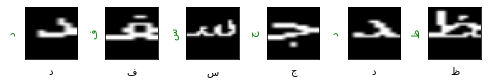

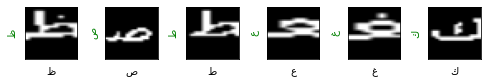

In [23]:
def show_preds():
    model.eval()
    images, labels = next(iter(dl_test))
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    show_images(images, labels, preds)
    
show_preds()
show_preds()


In [107]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import base64
import io
import sys

# sys.setrecursionlimit(10000)

with open(f"/Users/lena/Downloads/arlett_net_model.ckpt", "rb") as f:
    checkpoint = torch.load(f)
    state_dict = model.state_dict()
    for k1, k2 in zip(state_dict.keys(), checkpoint.keys()):
        state_dict[k1] = checkpoint[k2]
    model.load_state_dict(state_dict)

classes = ['ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'لا', 'م', 'ن', 'ه', 'و', 'ي']

def img_to_txt(filename):
    msg = b"<plain_txt_msg:img>"
    with open(filename, "rb") as imageFile:
        msg = msg + base64.b64encode(imageFile.read())
    msg = msg + b"<!plain_txt_msg>"
    return msg

def decode_img(msg):
#     msg = msg[msg.find(b"<plain_txt_msg:img>")+len(b"<plain_txt_msg:img>"):
#               msg.find(b"<!plain_txt_msg>")]
    msg = base64.b64decode(msg)
#     msg = base64.decodestring(msg).decode('utf-8')

#     msg = base64url_decode(msg.encode('utf-8'))
    buf = io.BytesIO(msg)
    img = Image.open(buf)
    return img

def pre_image(img):
    
    img = decode_img(img)
    imgnp = np.asarray(img)
    if(imgnp.shape[0] > 1):
        if(imgnp.shape[0] > 3):
            img = img.convert('RGB')

        transform_norm = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor(), transforms.Normalize([0.5], [0.5]), transforms.Grayscale()])
    else:
        transform_norm = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
    
    img_normalized = transform_norm(img)


    img_normalized = img_normalized.unsqueeze_(0)

    with torch.no_grad():
        model.eval()  
        output = model(img_normalized)
        index = output.data.cpu().numpy().argmax()
        probs = torch.softmax(output, dim=1)
        probs = probs[0][index].tolist()
        probs = round(probs, 2)

        class_name = classes[index]
        return class_name, probs


filename = '/Users/lena/Downloads/arLetters/test/ل/1063.png'

msg = img_to_txt(filename)
print(msg)
class_name, prob = pre_image("iVBORw0KGgoAAAANSUhEUgAAAAUAAAAWCAAAAAAtRgkMAAAAL0lEQVQIHRXBAQEAAAiDMOgfGv0mIy+BkJe85CUveclLXiZhPAmUkZGRkZGRkZE5crsNDN+lPX8AAAAASUVORK5CYII=")
print(class_name, prob)
print(type(prob))


b'<plain_txt_msg:img>iVBORw0KGgoAAAANSUhEUgAAAAUAAAAWCAAAAAAtRgkMAAAAL0lEQVQIHRXBAQEAAAiDMOgfGv0mIy+BkJe85CUveclLXiZhPAmUkZGRkZGRkZE5crsNDN+lPX8AAAAASUVORK5CYII=<!plain_txt_msg>'
ل 1.0
<class 'float'>
